# WeatherPy
----

### Analysis
* Max temperature falls strongly the farther north of the equator you go, as it is still winter in the farthest north latitudes, but the hottest points cluster between -30 and -15 latitude, not at 0. Presumably this is because summer is still winding down in certain areas.
* There is not any strong relationship between latitude and humidity, but it is interesting that there is a gap in the distribution of low humidity data points around latitude 0. (This might be an artifact of the particular cities randomly selected by the algorithm.)
* The OpenWeatherMap API documentation advises users to search by city ID instead of name. I wonder if there is a way to use OWM's list of cities and city IDs (a very, very long list) to randomly search the globe instead of using citipy. This could eliminate all (or most) of the missing data.

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import openweathermapy as ow
import time

# Import API key from api_keys.py
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "city_weather.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city_raw = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city = city_raw.city_name.title()
    country = city_raw.country_code.upper()
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [83]:
# Set up containers for the various data points
cloudiness = []
date = []
humidity = []
lat = []
lng = []
temp = []
wind = []

In [84]:
# Set API endpoint
url = 'http://api.openweathermap.org/data/2.5/weather'

In [85]:
# API is limited to 60 calls per minute
set_length = 60

In [86]:
print('Beginning Data Retrieval')
print('-'*50)
for i in range(len(cities)):
    set_num = i // set_length
    num_rec = i % set_length
    params = {
        'q': f'{cities[i]},{countries[i]}',
        'units': 'Imperial',
        'appid': api_key
    }
    print(f'Processing Record {num_rec} of Set {set_num} | {cities[i]}, {countries[i]}')
    response = requests.get(url, params = params).json()
    try:
        cloudiness.append(response['clouds']['all'])
    except:
        print('\t> Cloudiness info missing for this city.')
        cloudiness.append(None)
    try:
        date.append(response['dt'])
    except:
        print('\t> Date info missing for this city.')
        date.append(None)
    try:
        humidity.append(response['main']['humidity'])
    except:
        print('\t> Humidity info missing for this city.')
        humidity.append(None)
    try:
        lat.append(response['coord']['lat'])
    except:
        print('\t> Latitude info missing for this city.')
        lat.append(None)
    try:
        lng.append(response['coord']['lon'])
    except:
        print('\t> Longitude info missing for this city.')
        lng.append(None)
    try:
        temp.append(response['main']['temp_max'])
    except:
        print('\t> Temperature info missing for this city.')
        temp.append(None)
    try:
        wind.append(response['wind']['speed'])
    except:
        print('\t> Wind info missing for this city.')
        wind.append(None)
    # Make sure each API call lasts at least 1 second
    # so as not to go over 60 calls per second limit
    time.sleep(1)

Beginning Data Retrieval
------------------------------
Processing Record 0 of Set 0 | Bethel, US
Processing Record 1 of Set 0 | Mahebourg, MU
Processing Record 2 of Set 0 | Kamenka, RU
Processing Record 3 of Set 0 | Yellowknife, CA
Processing Record 4 of Set 0 | Saint George, BM
Processing Record 5 of Set 0 | Avarua, CK
Processing Record 6 of Set 0 | Lebu, CL
Processing Record 7 of Set 0 | Kapaa, US
Processing Record 8 of Set 0 | Hanyang, CN
Processing Record 9 of Set 0 | Vaini, TO
Processing Record 10 of Set 0 | Samana, DO
	> Cloudiness info missing for this city.
	> Date info missing for this city.
	> Humidity info missing for this city.
	> Latitude info missing for this city.
	> Longitude info missing for this city.
	> Temperature info missing for this city.
	> Wind info missing for this city.
Processing Record 11 of Set 0 | Barrow, US
Processing Record 12 of Set 0 | Labutta, MM
	> Cloudiness info missing for this city.
	> Date info missing for this city.
	> Humidity info missing f

Processing Record 36 of Set 1 | East London, ZA
Processing Record 37 of Set 1 | Puerto Ayora, EC
Processing Record 38 of Set 1 | Leh, IN
Processing Record 39 of Set 1 | Secunda, ZA
Processing Record 40 of Set 1 | Santa Maria, CV
Processing Record 41 of Set 1 | Balimo, PG
	> Cloudiness info missing for this city.
	> Date info missing for this city.
	> Humidity info missing for this city.
	> Latitude info missing for this city.
	> Longitude info missing for this city.
	> Temperature info missing for this city.
	> Wind info missing for this city.
Processing Record 42 of Set 1 | Tsihombe, MG
	> Cloudiness info missing for this city.
	> Date info missing for this city.
	> Humidity info missing for this city.
	> Latitude info missing for this city.
	> Longitude info missing for this city.
	> Temperature info missing for this city.
	> Wind info missing for this city.
Processing Record 43 of Set 1 | Touros, BR
Processing Record 44 of Set 1 | Prince Rupert, CA
Processing Record 45 of Set 1 | Tu

Processing Record 59 of Set 2 | Bernburg, DE
Processing Record 0 of Set 3 | Kangaatsiaq, GL
Processing Record 1 of Set 3 | Turukhansk, RU
Processing Record 2 of Set 3 | Bathsheba, BB
Processing Record 3 of Set 3 | New Norfolk, AU
Processing Record 4 of Set 3 | Katsuura, JP
Processing Record 5 of Set 3 | Ewa Beach, US
Processing Record 6 of Set 3 | Taoudenni, ML
Processing Record 7 of Set 3 | Redondo, PT
Processing Record 8 of Set 3 | Urdzhar, KZ
	> Cloudiness info missing for this city.
	> Date info missing for this city.
	> Humidity info missing for this city.
	> Latitude info missing for this city.
	> Longitude info missing for this city.
	> Temperature info missing for this city.
	> Wind info missing for this city.
Processing Record 9 of Set 3 | Pafos, CY
	> Cloudiness info missing for this city.
	> Date info missing for this city.
	> Humidity info missing for this city.
	> Latitude info missing for this city.
	> Longitude info missing for this city.
	> Temperature info missing for 

Processing Record 22 of Set 4 | Yaan, CN
	> Cloudiness info missing for this city.
	> Date info missing for this city.
	> Humidity info missing for this city.
	> Latitude info missing for this city.
	> Longitude info missing for this city.
	> Temperature info missing for this city.
	> Wind info missing for this city.
Processing Record 23 of Set 4 | Mecca, SA
Processing Record 24 of Set 4 | Longyearbyen, SJ
Processing Record 25 of Set 4 | Xian, CN
Processing Record 26 of Set 4 | Khorixas, NA
Processing Record 27 of Set 4 | Skjervoy, NO
Processing Record 28 of Set 4 | Liverpool, CA
Processing Record 29 of Set 4 | Viligili, MV
	> Cloudiness info missing for this city.
	> Date info missing for this city.
	> Humidity info missing for this city.
	> Latitude info missing for this city.
	> Longitude info missing for this city.
	> Temperature info missing for this city.
	> Wind info missing for this city.
Processing Record 30 of Set 4 | Whitehorse, CA
Processing Record 31 of Set 4 | Shimoda, JP

Processing Record 4 of Set 6 | Charlestown, KN
Processing Record 5 of Set 6 | El Badari, EG
	> Cloudiness info missing for this city.
	> Date info missing for this city.
	> Humidity info missing for this city.
	> Latitude info missing for this city.
	> Longitude info missing for this city.
	> Temperature info missing for this city.
	> Wind info missing for this city.
Processing Record 6 of Set 6 | Isangel, VU
Processing Record 7 of Set 6 | Yagodnoye, RU
Processing Record 8 of Set 6 | Pacific Grove, US
Processing Record 9 of Set 6 | Chara, RU
Processing Record 10 of Set 6 | Asau, TV
	> Cloudiness info missing for this city.
	> Date info missing for this city.
	> Humidity info missing for this city.
	> Latitude info missing for this city.
	> Longitude info missing for this city.
	> Temperature info missing for this city.
	> Wind info missing for this city.
Processing Record 11 of Set 6 | Kruisfontein, ZA
Processing Record 12 of Set 6 | Benghazi, LY
Processing Record 13 of Set 6 | Chulym,

Processing Record 51 of Set 7 | College, US
Processing Record 52 of Set 7 | Liwale, TZ
Processing Record 53 of Set 7 | Batouri, CM
Processing Record 54 of Set 7 | Verkhoyansk, RU
Processing Record 55 of Set 7 | Lata, SB
	> Cloudiness info missing for this city.
	> Date info missing for this city.
	> Humidity info missing for this city.
	> Latitude info missing for this city.
	> Longitude info missing for this city.
	> Temperature info missing for this city.
	> Wind info missing for this city.
Processing Record 56 of Set 7 | Buraydah, SA
Processing Record 57 of Set 7 | Ucluelet, CA
Processing Record 58 of Set 7 | Buta, CD
Processing Record 59 of Set 7 | Jacareacanga, BR
Processing Record 0 of Set 8 | Fajardo, US
	> Cloudiness info missing for this city.
	> Date info missing for this city.
	> Humidity info missing for this city.
	> Latitude info missing for this city.
	> Longitude info missing for this city.
	> Temperature info missing for this city.
	> Wind info missing for this city.
P

Processing Record 46 of Set 9 | Lethem, GY
Processing Record 47 of Set 9 | Agua Dulce, MX
Processing Record 48 of Set 9 | Sisimiut, GL
Processing Record 49 of Set 9 | Siguiri, GN
Processing Record 50 of Set 9 | Galgani, SD
	> Cloudiness info missing for this city.
	> Date info missing for this city.
	> Humidity info missing for this city.
	> Latitude info missing for this city.
	> Longitude info missing for this city.
	> Temperature info missing for this city.
	> Wind info missing for this city.
Processing Record 51 of Set 9 | Noumea, NC
Processing Record 52 of Set 9 | Faya, TD
	> Cloudiness info missing for this city.
	> Date info missing for this city.
	> Humidity info missing for this city.
	> Latitude info missing for this city.
	> Longitude info missing for this city.
	> Temperature info missing for this city.
	> Wind info missing for this city.
Processing Record 53 of Set 9 | Bougouni, ML
Processing Record 54 of Set 9 | Katobu, ID
Processing Record 55 of Set 9 | Zlitan, LY
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [87]:
weather_df = pd.DataFrame({'City':cities,'Country':countries,'Cloudiness':cloudiness,'Date':date,'Humidity':humidity,
              'Lat':lat,'Lng':lng,'Max Temp':temp,'Wind Speed':wind})

# Save weather dataframe to csv
weather_df.to_csv(output_data_file, index = False)

weather_df.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bethel,US,90.0,1.554163e+09,76.0,60.79,-161.76,46.40,6.93
1,Mahebourg,MU,20.0,1.554167e+09,88.0,-20.41,57.70,75.99,3.36
2,Kamenka,RU,0.0,1.554166e+09,66.0,53.19,44.05,37.99,7.16
3,Yellowknife,CA,75.0,1.554167e+09,57.0,62.45,-114.38,23.00,21.92
4,Saint George,BM,90.0,1.554167e+09,88.0,32.38,-64.68,68.00,13.87


In [88]:
# Many null rows, but enough non-null to continue
weather_df.count()

City          599
Country       599
Cloudiness    515
Date          515
Humidity      515
Lat           515
Lng           515
Max Temp      515
Wind Speed    515
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [76]:
# Get current date for labeling plots
from datetime import datetime
now = datetime.now()
current_date = now.strftime("%Y-%m-%d")

In [77]:
current_date

'2019-03-30'

#### Latitude vs. Temperature Plot

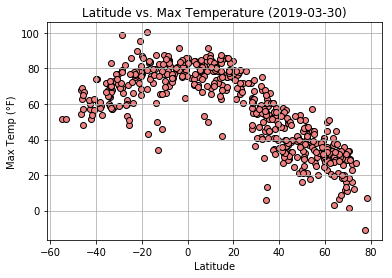

In [78]:
plt.scatter(weather_df['Lat'],weather_df['Max Temp'], color = 'lightcoral', edgecolor = 'black')
plt.title(f'Latitude vs. Max Temperature ({current_date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (°F)')
plt.grid()
# Save plot as PNG
plt.savefig('lat_vs_max_temp.png')
plt.show()

#### Latitude vs. Humidity Plot

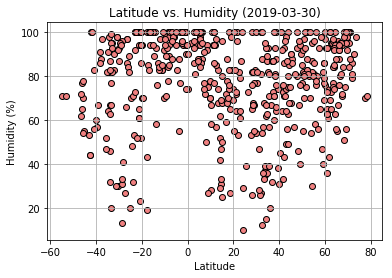

In [79]:
plt.scatter(weather_df['Lat'],weather_df['Humidity'], color = 'lightcoral', edgecolor = 'black')
plt.title(f'Latitude vs. Humidity ({current_date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
# Save plot as PNG
plt.savefig('lat_vs_humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

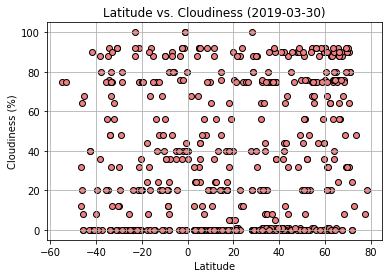

In [80]:
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'], color = 'lightcoral', edgecolor = 'black')
plt.title(f'Latitude vs. Cloudiness ({current_date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
# Save plot as PNG
plt.savefig('lat_vs_cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

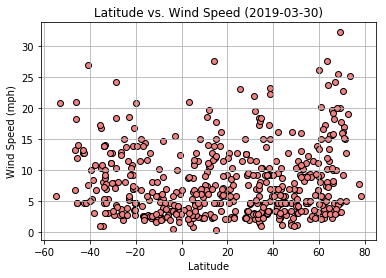

In [81]:
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'], color = 'lightcoral', edgecolor = 'black')
plt.title(f'Latitude vs. Wind Speed ({current_date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
# Save plot as PNG
plt.savefig('lat_vs_wind_speed.png')
plt.show()